# Predict value of home using logistic regression with variable features

In [1]:
#Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
pd.set_option('display.max_columns', None)
import scipy.stats as st
import math
#SciKit-Learn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.ensemble import RandomForestRegressor

# Loading the  Ames IA, CSV



In [2]:
ames = pd.read_csv("ames.csv")

In [3]:
#View column names
ames.columns.values

array(['Order', 'PID', 'MS.SubClass', 'MS.Zoning', 'Lot.Frontage',
       'Lot.Area', 'Street', 'Alley', 'Lot.Shape', 'Land.Contour',
       'Utilities', 'Lot.Config', 'Land.Slope', 'Neighborhood',
       'Condition.1', 'Condition.2', 'Bldg.Type', 'House.Style',
       'Overall.Qual', 'Overall.Cond', 'Year.Built', 'Year.Remod.Add',
       'Roof.Style', 'Roof.Matl', 'Exterior.1st', 'Exterior.2nd',
       'Mas.Vnr.Type', 'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond',
       'Foundation', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure',
       'BsmtFin.Type.1', 'BsmtFin.SF.1', 'BsmtFin.Type.2', 'BsmtFin.SF.2',
       'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating', 'Heating.QC',
       'Central.Air', 'Electrical', 'X1st.Flr.SF', 'X2nd.Flr.SF',
       'Low.Qual.Fin.SF', 'Gr.Liv.Area', 'Bsmt.Full.Bath',
       'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr',
       'Kitchen.AbvGr', 'Kitchen.Qual', 'TotRms.AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace.Qu', 'Garage.Type', 'Garage.Yr.Blt

# Reference sheet of what the data in the columns means.
http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

# Data Exploration

In [4]:
# there are 2930 homes in the data set
ames.shape

(2930, 82)

In [5]:
#ames.describe()
ames.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
# check the null data in the numeric features
numeric_percent_null = ames.isnull().sum()/ames.isnull().count()
numeric_percent_null.sort_values(ascending=False)

Pool.QC            0.995563
Misc.Feature       0.963823
Alley              0.932423
Fence              0.804778
Fireplace.Qu       0.485324
Lot.Frontage       0.167235
Garage.Qual        0.054266
Garage.Yr.Blt      0.054266
Garage.Cond        0.054266
Garage.Finish      0.054266
Garage.Type        0.053584
Bsmt.Exposure      0.028328
BsmtFin.Type.2     0.027645
BsmtFin.Type.1     0.027304
Bsmt.Cond          0.027304
Bsmt.Qual          0.027304
Mas.Vnr.Type       0.007850
Mas.Vnr.Area       0.007850
Bsmt.Full.Bath     0.000683
Bsmt.Half.Bath     0.000683
Garage.Area        0.000341
Garage.Cars        0.000341
Total.Bsmt.SF      0.000341
Bsmt.Unf.SF        0.000341
BsmtFin.SF.2       0.000341
BsmtFin.SF.1       0.000341
Electrical         0.000341
Exterior.2nd       0.000000
Exterior.1st       0.000000
Roof.Matl          0.000000
                     ...   
Heating            0.000000
Exter.Cond         0.000000
Functional         0.000000
Sale.Type          0.000000
Yr.Sold            0

In [7]:
#These were removed because of how many values were missing
drop_columns = ['Pool.QC','Fireplace.Qu']
for column in drop_columns:
    ames = ames.drop(column, axis=1)

In [8]:
#fill in the missing garage value since there was no garage
ames['Garage.Yr.Blt'] = ames['Garage.Yr.Blt'].fillna(0)

In [9]:
# re check percentage of missing data
pd.DataFrame(
    ames.isnull().sum()/len(ames),
    columns=['% Missing Values']).transpose()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
% Missing Values,0.0,0.0,0.0,0.0,0.167235,0.0,0.0,0.932423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00785,0.00785,0.0,0.0,0.0,0.027304,0.027304,0.028328,0.027304,0.000341,0.027645,0.000341,0.000341,0.000341,0.0,0.0,0.0,0.000341,0.0,0.0,0.0,0.0,0.000683,0.000683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053584,0.0,0.054266,0.000341,0.000341,0.054266,0.054266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.804778,0.963823,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# fill in the missing values of the columns with the mean since the missing values were so few

ames.fillna(ames.mean())

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.00000,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.00000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.00000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.00000,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.00000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.00000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.00000,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1338,1.0,0.0,2,0,2,1,Gd,6,Typ,0,Attchd,2001.0,Fin,2.0,582.0,TA,TA,Y,0,0,170,0,0,0,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.00000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.00000,5389,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1180.0,Unf,0.0,415.0,1595.0,GasA,Ex,Y,SBrkr,1616,0,0,1616,1.0,0.0,2,0,2,1,Gd,5,Typ,1,Attchd,1995

In [11]:
# re check percentage of missing data
pd.DataFrame(
    ames.isnull().sum()/len(ames),
    columns=['% Missing Values']).transpose()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
% Missing Values,0.0,0.0,0.0,0.0,0.167235,0.0,0.0,0.932423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00785,0.00785,0.0,0.0,0.0,0.027304,0.027304,0.028328,0.027304,0.000341,0.027645,0.000341,0.000341,0.000341,0.0,0.0,0.0,0.000341,0.0,0.0,0.0,0.0,0.000683,0.000683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053584,0.0,0.054266,0.000341,0.000341,0.054266,0.054266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.804778,0.963823,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#fill in the na spaces with 0
ames= ames.fillna(0)

In [13]:
# returns percentage of missing values
pd.DataFrame(
    ames.isnull().sum()/len(ames),
    columns=['% Missing Values']).transpose()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
% Missing Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Cleaning

In [14]:
#view what is being worked with
ames.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,MnPrv,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,0,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,0,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,MnPrv,0,0,3,2010,WD,Normal,189900


In [15]:
# added columns to tell age of home as well as how long since last remodel. Since we combinded these columns we removed the
#originals to prevent duplicate data
ames['Age.When.Sold'] = ames ['Yr.Sold'] - ames ['Year.Built']
ames['Years.Since.Remodel'] = ames ['Yr.Sold'] - ames ['Year.Remod.Add']
# adding column to tell total living area with each home
ames['Total.Living.Area'] = ames['Total.Bsmt.SF'] + ames['Gr.Liv.Area']

In [16]:
# lets see what we have
ames.describe()

,Order,PID,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Mas.Vnr.Area,BsmtFin.SF.1,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,TotRms.AbvGrd,Fireplaces,Garage.Yr.Blt,Garage.Cars,Garage.Area,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold,SalePrice,Age.When.Sold,Years.Since.Remodel,Total.Living.Area
count,2930.00000,2.930000e+03,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,57.647782,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.096928,442.478498,49.705461,559.071672,1051.255631,1159.557679,335.455973,4.676792,1499.690444,0.431058,0.061092,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1870.786689,1.766212,472.658362,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068,36.434130,23.523891,2550.946075
std,845.96247,1.887308e+08,42.638025,33.499441,7880.017759,1.411026,1.111537,30.245361,20.860286,178.634545,455.586452,169.142089,439.540571,440.968018,391.890885,428.395715,46.310510,505.508887,0.524762,0.245175,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,448.894077,0.761137,215.187196,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357,30.291357,20.858846,805.253248
min,1.00000,5.263011e+08,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,-1.000000,-2.000000,334.000000
25%,733.25000,5.284770e+08,20.000000,43.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000,7.000000,4.000000,2004.000000
50%,1465.50000,5.354536e+08,50.000000,63.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,465.500000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000,34.000000,15.000000,2452.000000
75%,2197.75000,9.071811e+08,70.000000,78.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,162.750000,734.000000,0.000000,801.750000,1301.500000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000,54.000000,42.750000,2994.500000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.0

In [17]:
#Lets see how close the features relate to the sales price of the home

ames.corr()["SalePrice"].sort_values(ascending=False)

SalePrice              1.000000
Overall.Qual           0.799262
Total.Living.Area      0.790073
Gr.Liv.Area            0.706780
Garage.Cars            0.647562
Garage.Area            0.640138
Total.Bsmt.SF          0.632529
X1st.Flr.SF            0.621676
Year.Built             0.558426
Full.Bath              0.545604
Year.Remod.Add         0.532974
Mas.Vnr.Area           0.502196
TotRms.AbvGrd          0.495474
Fireplaces             0.474558
BsmtFin.SF.1           0.433147
Wood.Deck.SF           0.327143
Open.Porch.SF          0.312951
Half.Bath              0.285056
Bsmt.Full.Bath         0.275823
X2nd.Flr.SF            0.269373
Lot.Area               0.266549
Garage.Yr.Blt          0.253459
Lot.Frontage           0.201875
Bsmt.Unf.SF            0.183308
Bedroom.AbvGr          0.143913
Screen.Porch           0.112151
Pool.Area              0.068403
Mo.Sold                0.035259
X3Ssn.Porch            0.032225
BsmtFin.SF.2           0.006018
Misc.Val              -0.015691
Yr.Sold 

In [18]:
#dropping columns with a correlation of  <+-.1
ames.drop ('Pool.Area', axis=1, inplace=True)
ames.drop ('Mo.Sold', axis=1, inplace=True)
ames.drop ('X3Ssn.Porch', axis=1, inplace = True)
ames.drop ('BsmtFin.SF.2', axis=1, inplace = True)
ames.drop ('Misc.Val', axis=1, inplace = True)
ames.drop ('Yr.Sold', axis=1, inplace= True)
ames.drop ('Order', axis=1, inplace = True)
ames.drop ('Bsmt.Half.Bath', axis=1, inplace= True)
ames.drop ('Low.Qual.Fin.SF', axis=1, inplace= True)
ames.drop ('MS.SubClass', axis=1, inplace= True)
ames.drop ('Year.Remod.Add', axis=1, inplace= True)
ames.drop ('Year.Built', axis=1, inplace= True)
ames.drop ('Total.Bsmt.SF', axis=1, inplace= True)
ames.drop ('Gr.Liv.Area', axis=1, inplace= True)
ames.drop ('Lot.Frontage', axis=1, inplace= True)

#ames.drop ('Yr.Sold', axis=1, inplace= True)
#we dropped Total.Bsmt.SF and Gr.Liv.Area because we created the Total.Living.Area
# we removed Year.Remod.Add, Yr.Sold, and Year.Remod.Add because we used them to create 2 other variables.

In [19]:
#percentage of missing values in each column checking again after dropping
pd.DataFrame(
    ames.isnull().sum()/len(ames),
    columns=['% Missing Values']).transpose()
#we have all zeros which means we have no missing values

,PID,MS.Zoning,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,Bsmt.Unf.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Bsmt.Full.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,Screen.Porch,Fence,Misc.Feature,Sale.Type,Sale.Condition,SalePrice,Age.When.Sold,Years.Since.Remodel,Total.Living.Area
% Missing Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Let's remove the outliers based upon square footage
ames = ames.loc[ames['Total.Living.Area']<=4500,:]
ames.shape

(2877, 68)

In [21]:
# look at the max values
ames.max()

PID                    1007100110
MS.Zoning                      RM
Lot.Area                   215245
Street                       Pave
Lot.Shape                     Reg
Land.Contour                  Lvl
Utilities                  NoSewr
Lot.Config                 Inside
Land.Slope                    Sev
Neighborhood              Veenker
Condition.1                  RRNn
Condition.2                  RRNn
Bldg.Type                  TwnhsE
House.Style                  SLvl
Overall.Qual                   10
Overall.Cond                    9
Roof.Style                   Shed
Roof.Matl                 WdShngl
Exterior.1st              WdShing
Exterior.2nd              Wd Shng
Mas.Vnr.Area                 1600
Exter.Qual                     TA
Exter.Cond                     TA
Foundation                   Wood
BsmtFin.SF.1                 1904
Bsmt.Unf.SF                  2140
Heating                      Wall
Heating.QC                     TA
Central.Air                     Y
X1st.Flr.SF   

# Lets Look into Correlation

In [22]:
#sns.pairplot(ames)

# Numerical From Categorical Info

In [23]:
#ames_numerial is the numerical data types
ames_numerical = ames.select_dtypes(include=['int64','float64'])
ames_categorical = ames.select_dtypes(exclude=['int64','float64'])

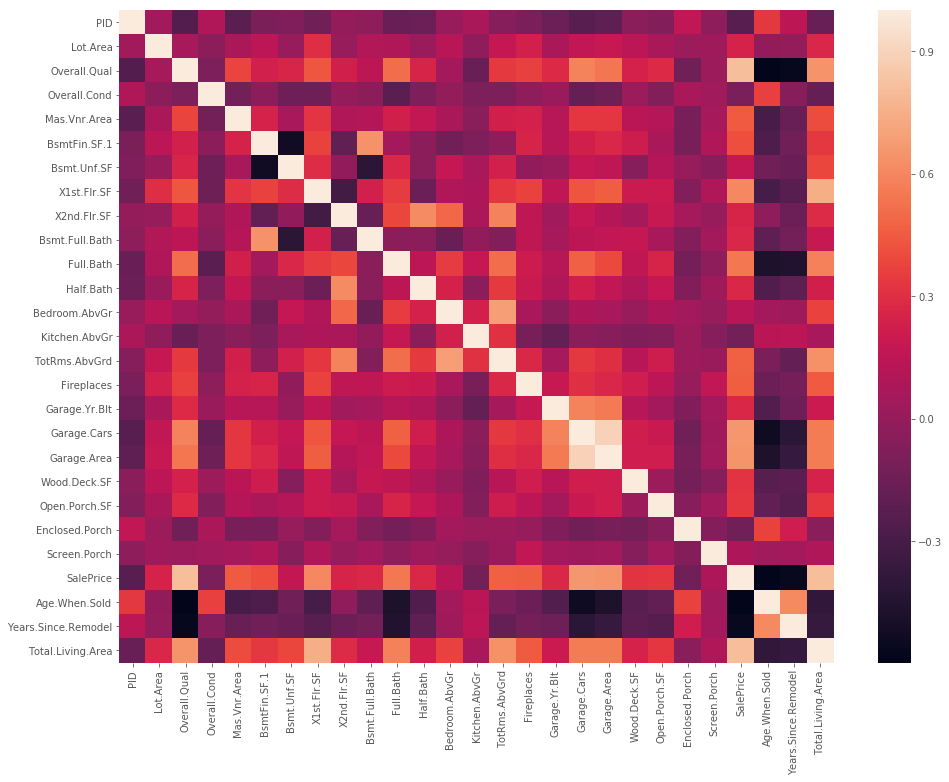

In [24]:
corr_2 = ames_numerical.corr()
plt.figure(figsize = (16,12))
sns.heatmap(corr_2,
           xticklabels=corr_2.columns.values,
           yticklabels = corr_2.columns.values)

# Checking for skew in the data

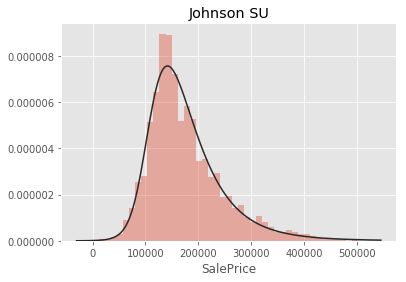

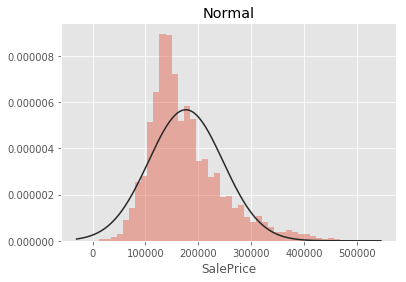

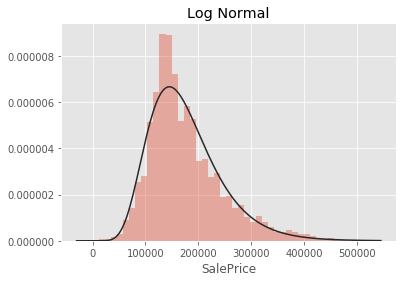

In [25]:
#lets visualize the data
y = ames['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)

plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)


In [26]:
#skew before normalization no good since doesn't fall within +-.5
print("Skew: %f" % ames['SalePrice'].skew())

Skew: 1.167588


In [27]:
ames_categorical.head()

,MS.Zoning,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.Type.2,Heating,Heating.QC,Central.Air,Electrical,Kitchen.Qual,Functional,Garage.Type,Garage.Finish,Garage.Qual,Garage.Cond,Paved.Drive,Fence,Misc.Feature,Sale.Type,Sale.Condition
0,RL,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Attchd,Fin,TA,TA,P,0,0,WD,Normal
1,RH,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,MnPrv,0,WD,Normal
2,RL,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,0,Gar2,WD,Normal
3,RL,Pave,0,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Attchd,Fin,TA,TA,Y,0,0,WD,Normal
4,RL,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,MnPrv,0,WD,Normal


# Adjusting the skew of the data 


In [28]:
ames_numerical += .00001

In [29]:
# the skews are not normailzed so we need to fix this
all_skews = ames_numerical.apply(stats.skew, axis=0)
all_skews

PID                     0.035328
Lot.Area               13.688548
Overall.Qual            0.116913
Overall.Cond            0.548843
Mas.Vnr.Area            2.579823
BsmtFin.SF.1            0.719266
Bsmt.Unf.SF             0.900989
X1st.Flr.SF             0.781147
X2nd.Flr.SF             0.819192
Bsmt.Full.Bath          0.618789
Full.Bath               0.140315
Half.Bath               0.729813
Bedroom.AbvGr           0.237703
Kitchen.AbvGr           4.303046
TotRms.AbvGrd           0.633080
Fireplaces              0.734129
Garage.Yr.Blt          -3.902001
Garage.Cars            -0.218378
Garage.Area             0.183676
Wood.Deck.SF            1.833692
Open.Porch.SF           2.532391
Enclosed.Porch          4.007528
Screen.Porch            3.993436
SalePrice               1.166979
Age.When.Sold           0.583405
Years.Since.Remodel     0.427637
Total.Living.Area       0.319885
dtype: float64

In [30]:
# transform skew to fall within .5 of 0
skews_to_transform = all_skews[all_skews.abs()>.5]
skew_columns = skews_to_transform.index.tolist()

In [31]:
# skewing the columns to fall within the accepted range
skew_transformed_columns = ames_numerical[skew_columns].apply(np.log)
transformed_numeric = pd.concat([ames_numerical[ames_numerical.columns[~ames_numerical.columns.isin(skew_columns)]],
                                skew_transformed_columns],axis=1)



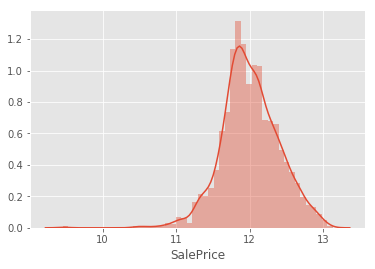

In [32]:
sns.distplot(transformed_numeric.SalePrice)

In [33]:
#the skew falls within the accepted tolerances
print("Skew: %f" % transformed_numeric['SalePrice'].skew())

Skew: -0.214273


# Converting categorical info to binary info


In [34]:
#creating dummy variables for the categorical columns
categorical_list = ames_categorical.columns.tolist()
housing_dummies=pd.get_dummies(ames_categorical,columns=categorical_list)
housing_dummies.head()

,MS.Zoning_A (agr),MS.Zoning_C (all),MS.Zoning_FV,MS.Zoning_I (all),MS.Zoning_RH,MS.Zoning_RL,MS.Zoning_RM,Street_Grvl,Street_Pave,Alley_0,Alley_Grvl,Alley_Pave,Lot.Shape_IR1,Lot.Shape_IR2,Lot.Shape_IR3,Lot.Shape_Reg,Land.Contour_Bnk,Land.Contour_HLS,Land.Contour_Low,Land.Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot.Config_Corner,Lot.Config_CulDSac,Lot.Config_FR2,Lot.Config_FR3,Lot.Config_Inside,Land.Slope_Gtl,Land.Slope_Mod,Land.Slope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition.1_Artery,Condition.1_Feedr,Condition.1_Norm,Condition.1_PosA,Condition.1_PosN,Condition.1_RRAe,Condition.1_RRAn,Condition.1_RRNe,Condition.1_RRNn,Condition.2_Artery,Condition.2_Feedr,Condition.2_Norm,Condition.2_PosA,Condition.2_PosN,Condition.2_RRAe,Condition.2_RRAn,Condition.2_RRNn,Bldg.Type_1Fam,Bldg.Type_2fmCon,Bldg.Type_Duplex,Bldg.Type_Twnhs,Bldg.Type_TwnhsE,House.Style_1.5Fin,House.Style_1.5Unf,House.Style_1Story,House.Style_2.5Fin,House.Style_2.5Unf,House.Style_2Story,House.Style_SFoyer,House.Style_SLvl,Roof.Style_Flat,Roof.Style_Gable,Roof.Style_Gambrel,Roof.Style_Hip,Roof.Style_Mansard,Roof.Style_Shed,Roof.Matl_CompShg,Roof.Matl_Membran,Roof.Matl_Metal,Roof.Matl_Roll,Roof.Matl_Tar&Grv,Roof.Matl_WdShake,Roof.Matl_WdShngl,Exterior.1st_AsbShng,Exterior.1st_AsphShn,Exterior.1st_BrkComm,Exterior.1st_BrkFace,Exterior.1st_CBlock,Exterior.1st_CemntBd,Exterior.1st_HdBoard,Exterior.1st_ImStucc,Exterior.1st_MetalSd,Exterior.1st_Plywood,Exterior.1st_PreCast,Exterior.1st_Stone,Exterior.1st_Stucco,Exterior.1st_VinylSd,Exterior.1st_Wd Sdng,Exterior.1st_WdShing,Exterior.2nd_AsbShng,Exterior.2nd_AsphShn,Exterior.2nd_Brk Cmn,Exterior.2nd_BrkFace,Exterior.2nd_CBlock,Exterior.2nd_CmentBd,Exterior.2nd_HdBoard,Exterior.2nd_ImStucc,Exterior.2nd_MetalSd,Exterior.2nd_Other,Exterior.2nd_Plywood,Exterior.2nd_PreCast,Exterior.2nd_Stone,Exterior.2nd_Stucco,Exterior.2nd_VinylSd,Exterior.2nd_Wd Sdng,Exterior.2nd_Wd Shng,Mas.Vnr.Type_0,Mas.Vnr.Type_BrkCmn,Mas.Vnr.Type_BrkFace,Mas.Vnr.Type_CBlock,Mas.Vnr.Type_None,Mas.Vnr.Type_Stone,Exter.Qual_Ex,Exter.Qual_Fa,Exter.Qual_Gd,Exter.Qual_TA,Exter.Cond_Ex,Exter.Cond_Fa,Exter.Cond_Gd,Exter.Cond_Po,Exter.Cond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt.Qual_0,Bsmt.Qual_Ex,Bsmt.Qual_Fa,Bsmt.Qual_Gd,Bsmt.Qual_Po,Bsmt.Qual_TA,Bsmt.Cond_0,Bsmt.Cond_Ex,Bsmt.Cond_Fa,Bsmt.Cond_Gd,Bsmt.Cond_Po,Bsmt.Cond_TA,Bsmt.Exposure_0,Bsmt.Exposure_Av,Bsmt.Exposure_Gd,Bsmt.Exposure_Mn,Bsmt.Exposure_No,BsmtFin.Type.1_0,BsmtFin.Type.1_ALQ,BsmtFin.Type.1_BLQ,BsmtFin.Type.1_GLQ,BsmtFin.Type.1_LwQ,BsmtFin.Type.1_Rec,BsmtFin.Type.1_Unf,BsmtFin.Type.2_0,BsmtFin.Type.2_ALQ,BsmtFin.Type.2_BLQ,BsmtFin.Type.2_GLQ,BsmtFin.Type.2_LwQ,BsmtFin.Type.2_Rec,BsmtFin.Type.2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating.QC_Ex,Heating.QC_Fa,Heating.QC_Gd,Heating.QC_Po,Heating.QC_TA,Central.Air_N,Central.Air_Y,Electrical_0,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen.Qual_Ex,Kitchen.Qual_Fa,Kitchen.Qual_Gd,Kitchen.Qual_Po,Kitchen.Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage.Type_0,Garage.Type_2Types,Garage.Type_Attchd,Garage.Type_Basment,Garage.Type_BuiltIn,Garage.Type_CarPort,Garage.Type_Detchd,Garage.Finish_0,Garage.Finish_Fin,Garage.Finish_RFn,Garage.Finish_Unf,Gara

In [35]:
#combines the 2 data frames back together with the dummie variables included
result= pd.concat([transformed_numeric.merge(housing_dummies, left_index=True, right_index=True)])

In [36]:
#looking here you can see the 2 data frames are put back together correctly
result.head()


,PID,Overall.Qual,Full.Bath,Bedroom.AbvGr,Garage.Cars,Garage.Area,Years.Since.Remodel,Total.Living.Area,Lot.Area,Overall.Cond,Mas.Vnr.Area,BsmtFin.SF.1,Bsmt.Unf.SF,X1st.Flr.SF,X2nd.Flr.SF,Bsmt.Full.Bath,Half.Bath,Kitchen.AbvGr,TotRms.AbvGrd,Fireplaces,Garage.Yr.Blt,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,Screen.Porch,SalePrice,Age.When.Sold,MS.Zoning_A (agr),MS.Zoning_C (all),MS.Zoning_FV,MS.Zoning_I (all),MS.Zoning_RH,MS.Zoning_RL,MS.Zoning_RM,Street_Grvl,Street_Pave,Alley_0,Alley_Grvl,Alley_Pave,Lot.Shape_IR1,Lot.Shape_IR2,Lot.Shape_IR3,Lot.Shape_Reg,Land.Contour_Bnk,Land.Contour_HLS,Land.Contour_Low,Land.Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot.Config_Corner,Lot.Config_CulDSac,Lot.Config_FR2,Lot.Config_FR3,Lot.Config_Inside,Land.Slope_Gtl,Land.Slope_Mod,Land.Slope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition.1_Artery,Condition.1_Feedr,Condition.1_Norm,Condition.1_PosA,Condition.1_PosN,Condition.1_RRAe,Condition.1_RRAn,Condition.1_RRNe,Condition.1_RRNn,Condition.2_Artery,Condition.2_Feedr,Condition.2_Norm,Condition.2_PosA,Condition.2_PosN,Condition.2_RRAe,Condition.2_RRAn,Condition.2_RRNn,Bldg.Type_1Fam,Bldg.Type_2fmCon,Bldg.Type_Duplex,Bldg.Type_Twnhs,Bldg.Type_TwnhsE,House.Style_1.5Fin,House.Style_1.5Unf,House.Style_1Story,House.Style_2.5Fin,House.Style_2.5Unf,House.Style_2Story,House.Style_SFoyer,House.Style_SLvl,Roof.Style_Flat,Roof.Style_Gable,Roof.Style_Gambrel,Roof.Style_Hip,Roof.Style_Mansard,Roof.Style_Shed,Roof.Matl_CompShg,Roof.Matl_Membran,Roof.Matl_Metal,Roof.Matl_Roll,Roof.Matl_Tar&Grv,Roof.Matl_WdShake,Roof.Matl_WdShngl,Exterior.1st_AsbShng,Exterior.1st_AsphShn,Exterior.1st_BrkComm,Exterior.1st_BrkFace,Exterior.1st_CBlock,Exterior.1st_CemntBd,Exterior.1st_HdBoard,Exterior.1st_ImStucc,Exterior.1st_MetalSd,Exterior.1st_Plywood,Exterior.1st_PreCast,Exterior.1st_Stone,Exterior.1st_Stucco,Exterior.1st_VinylSd,Exterior.1st_Wd Sdng,Exterior.1st_WdShing,Exterior.2nd_AsbShng,Exterior.2nd_AsphShn,Exterior.2nd_Brk Cmn,Exterior.2nd_BrkFace,Exterior.2nd_CBlock,Exterior.2nd_CmentBd,Exterior.2nd_HdBoard,Exterior.2nd_ImStucc,Exterior.2nd_MetalSd,Exterior.2nd_Other,Exterior.2nd_Plywood,Exterior.2nd_PreCast,Exterior.2nd_Stone,Exterior.2nd_Stucco,Exterior.2nd_VinylSd,Exterior.2nd_Wd Sdng,Exterior.2nd_Wd Shng,Mas.Vnr.Type_0,Mas.Vnr.Type_BrkCmn,Mas.Vnr.Type_BrkFace,Mas.Vnr.Type_CBlock,Mas.Vnr.Type_None,Mas.Vnr.Type_Stone,Exter.Qual_Ex,Exter.Qual_Fa,Exter.Qual_Gd,Exter.Qual_TA,Exter.Cond_Ex,Exter.Cond_Fa,Exter.Cond_Gd,Exter.Cond_Po,Exter.Cond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt.Qual_0,Bsmt.Qual_Ex,Bsmt.Qual_Fa,Bsmt.Qual_Gd,Bsmt.Qual_Po,Bsmt.Qual_TA,Bsmt.Cond_0,Bsmt.Cond_Ex,Bsmt.Cond_Fa,Bsmt.Cond_Gd,Bsmt.Cond_Po,Bsmt.Cond_TA,Bsmt.Exposure_0,Bsmt.Exposure_Av,Bsmt.Exposure_Gd,Bsmt.Exposure_Mn,Bsmt.Exposure_No,BsmtFin.Type.1_0,BsmtFin.Type.1_ALQ,BsmtFin.Type.1_BLQ,BsmtFin.Type.1_GLQ,BsmtFin.Type.1_LwQ,BsmtFin.Type.1_Rec,BsmtFin.Type.1_Unf,BsmtFin.Type.2_0,BsmtFin.Type.2_ALQ,BsmtFin.Type.2_BLQ,BsmtFin.Type.2_GLQ,BsmtFin.Type.2_LwQ,BsmtFin.Type.2_Rec,BsmtFin.Type.2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating.QC_Ex,Heating.QC_Fa,Heating.QC_Gd,Heating.QC_Po,Heating.QC_TA,Central.Air_N,Central.Air_Y,Electrical_0,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen.Qual_Ex,Kitchen.Qual_Fa,Kitchen.Qual_Gd,Kitchen.Qual_Po,K

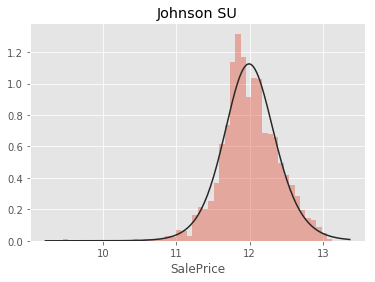

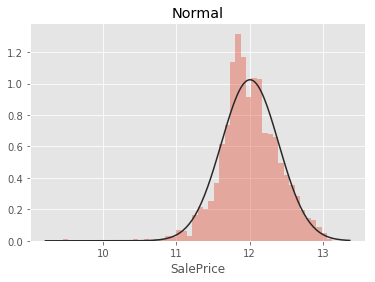

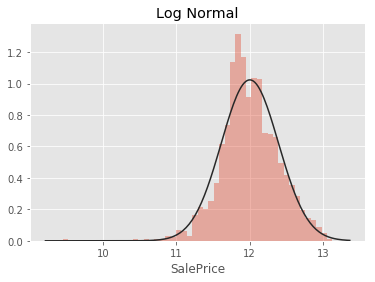

In [37]:
#Check skew again for final results
y = transformed_numeric['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)

plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)


# Root Mean Squared Error

In [38]:
housing_X_transformed = result.copy()

In [39]:
housing_y = ames.SalePrice

In [40]:
housing_X_transformed = housing_X_transformed.drop("SalePrice",axis=1)

In [41]:
# split between train and test set
X_train, X_test, y_train, y_test = train_test_split(
     housing_X_transformed, housing_y, test_size=0.3, random_state=42)

In [42]:
# lets fit the model
linereg = LinearRegression()
linereg.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Building the models

In [43]:
# checking the split of the data
X_train.shape, X_test.shape

((2013, 297), (864, 297))

In [44]:
X_train.columns

Index(['PID', 'Overall.Qual', 'Full.Bath', 'Bedroom.AbvGr', 'Garage.Cars',
       'Garage.Area', 'Years.Since.Remodel', 'Total.Living.Area', 'Lot.Area',
       'Overall.Cond',
       ...
       'Sale.Type_New', 'Sale.Type_Oth', 'Sale.Type_VWD', 'Sale.Type_WD ',
       'Sale.Condition_Abnorml', 'Sale.Condition_AdjLand',
       'Sale.Condition_Alloca', 'Sale.Condition_Family',
       'Sale.Condition_Normal', 'Sale.Condition_Partial'],
      dtype='object', length=297)

# Mapping the estimated prices to the predicted price of the project with a 70/30

In [45]:
#build and train regressor
rf_model = RandomForestRegressor(n_estimators=1000, n_jobs=-1,
        random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [46]:
rf_test_pred = rf_model.predict(X_test)

In [47]:
# lets score the model .902 is a very good score, perfect is 1.0
rf_model.score(X_test, y_test)

0.902269984325881

Text(0, 0.5, 'Actual')

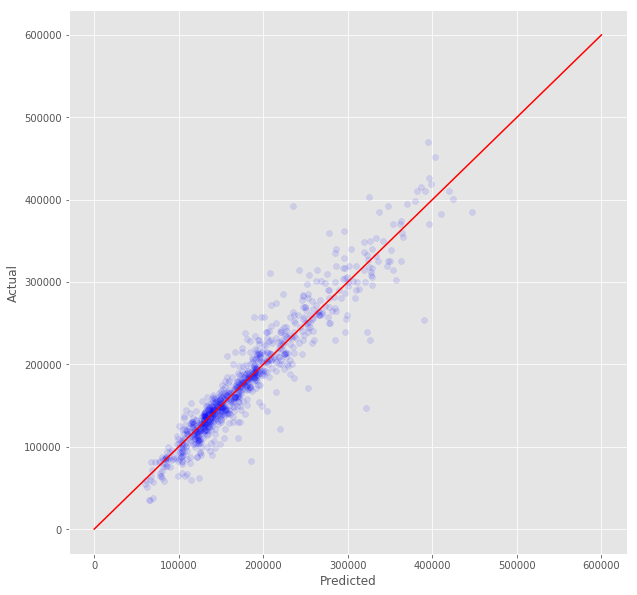

In [48]:
plt.figure(figsize=(10,10))
plt.scatter(rf_test_pred, y_test, alpha=.1, c='blue')
plt.plot(np.linspace(0,600000, 1000), np.linspace(0,600000, 1000), 'r-');
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Root mean squared error for an 80/20 split

In [49]:
# work with the "result variable"
housing_X_transformed = result.copy()

In [50]:
housing_y = ames.SalePrice

In [51]:
housing_X_transformed = housing_X_transformed.drop("SalePrice",axis=1)

In [52]:
# rest the x train through y test variables with a .2 test size instead of the .3
X_train, X_test, y_train, y_test = train_test_split(
     housing_X_transformed, housing_y, test_size=0.2, random_state=42)

In [53]:
linereg = LinearRegression()
linereg.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
#train set rmse
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, linereg.predict(X_train)))
rmse_train = rmse_train/(max(y_train) - min(y_train))
print ("Training set RMSE: ", rmse_train)
       

Training set RMSE:  0.03539435228189442


In [55]:
# Test set RMSE. A score of .051 is awesome, the lower the better
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, linereg.predict(X_test)))
rmse_test = rmse_test/(max(y_test) - min(y_test))
print ("Test set RMSE: ", rmse_test)

Test set RMSE:  0.051927605184248174


In [56]:
rf_model = RandomForestRegressor(n_estimators=1000, n_jobs=-1,
        random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [57]:
rf_test_pred = rf_model.predict(X_test)

In [58]:
#Use this to compute the correlation score between the predicted values and y values. 
#The best score is 1 and the worst value is 0. 

rf_model.score(X_test, y_test)

0.8947984518287018

Text(0, 0.5, 'Actual')

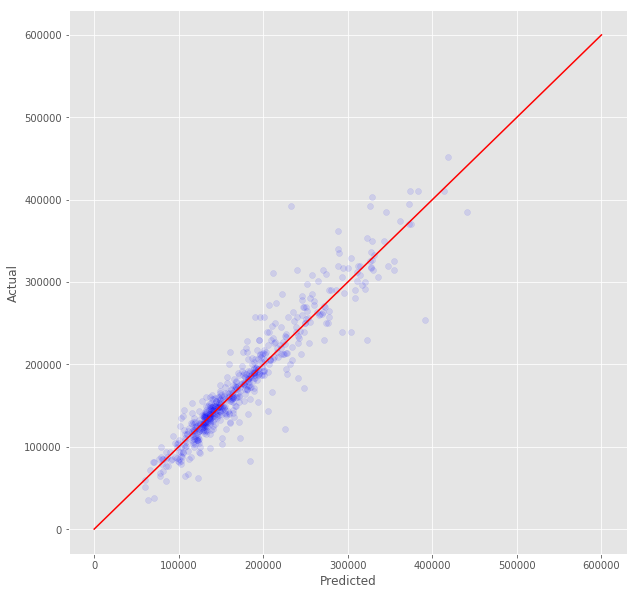

In [59]:
plt.figure(figsize=(10,10))
plt.scatter(rf_test_pred, y_test, alpha=.1, c='blue')
plt.plot(np.linspace(0,600000, 1000), np.linspace(0,600000, 1000), 'r-');
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Quick facts in the Data

In [60]:
# Most Expensive home
ames.SalePrice.max()

501837

In [61]:
#cheapest home
ames.SalePrice.min()

12789

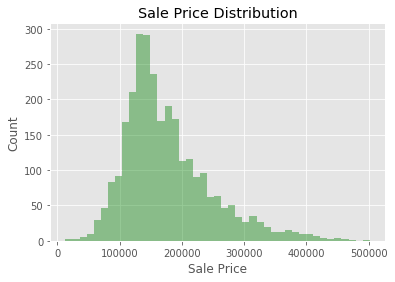

In [62]:
#histogram of the view distrubution
sns.distplot(ames['SalePrice'],color="g", kde=False)
plt.title("Sale Price Distribution")
plt.ylabel("Count")
plt.xlabel("Sale Price");

In [63]:
#types of homes
home_type = ames['Bldg.Type'].value_counts().keys().tolist()
counts = ames['Bldg.Type'].value_counts().tolist()
print(ames['Bldg.Type'].value_counts())

1Fam      2375
TwnhsE     232
Duplex     109
Twnhs      101
2fmCon      60
Name: Bldg.Type, dtype: int64


In [64]:
#Simple exercise to see mean sale price of a home pertaining to the neighborhood.
ames.groupby('Neighborhood', as_index=True)['SalePrice'].mean()

Neighborhood
Blmngtn    196661.678571
Blueste    143590.000000
BrDale     105608.333333
BrkSide    124756.250000
ClearCr    208851.906977
CollgCr    200776.379699
Crawfor    207618.745098
Edwards    128631.663158
Gilbert    190646.575758
Greens     193531.250000
GrnHill    280000.000000
IDOTRR     103752.903226
Landmrk    137000.000000
MeadowV     95756.486486
Mitchel    162226.631579
NAmes      144645.081448
NPkVill    140710.869565
NWAmes     187717.730769
NoRidge    302889.645161
NridgHt    300879.465753
OldTown    121542.635593
SWISU      133690.489362
Sawyer     136751.152318
SawyerW    182973.975806
Somerst    227405.466667
StoneBr    298279.477273
Timber     246599.541667
Veenker    242893.478261
Name: SalePrice, dtype: float64

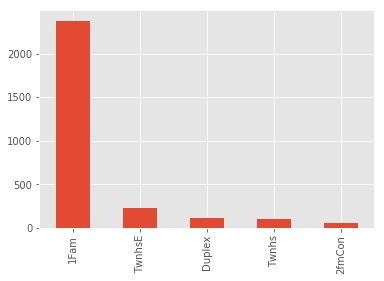

In [65]:
# bar graph of the grouped by type of homes sold
pd.value_counts(ames['Bldg.Type']).plot.bar()